## Optical Flow implementation 
## Name : Nitin kandpal
## Roll Number : 2018802004 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
#write the optical flow function with close loop solution 

In [15]:
def optical_flow(img1, img2, window_size,mg_thre):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])
    half_window = int(np.floor(window_size/2))
    
    magnitude = img1.copy()             # cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    #magnitude = np.zeros(img1.shape) 
    direction = np.zeros(img2.shape)
    img1 = img1 / 255. # normalize pixels
    img2 = img2 / 255. # normalize pixels
    
    #calculating fx fy and ft for full image 
    Ix = cv2.filter2D(img1,-1,kernel_x)
    Iy = cv2.filter2D(img1,-1,kernel_y)
    It = cv2.filter2D(img1,-1,kernel_t) + cv2.filter2D(img2,-1,-kernel_t)
    u = np.zeros(img1.shape)
    v = np.zeros(img2.shape)
    
    X = []
    Y = []
    U = []
    V = []

    # within window window_size * window_size
    for i in range(half_window, img1.shape[0]-half_window):
        for j in range(half_window, img1.shape[1]-half_window):
            fx = Ix[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            fy = Iy[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            ft = It[i-half_window:i+half_window+1, j-half_window:j+half_window+1].flatten()
            
            sum_fx_square = np.sum(np.square(np.multiply(fx,fx)))
            sum_fy_square = np.sum(np.square(np.multiply(fy,fy)))
            sum_fx_fy = np.sum(np.square(np.multiply(fx,fy)))
            sum_fx_ft = np.sum(np.square(np.multiply(fx,ft)))
            sum_fy_ft = np.sum(np.square(np.multiply(fy,ft)))
            whole_sum_fx_fy = np.square(np.sum(np.multiply(fx,fy)))
            
            
            #print(sum_fx_square)
            #print(sum_fy_square)
            #print(sum_fx_fy)
            #if (sum_fx_ft > 0):
            #    print(sum_fx_ft)
            #    print(sum_fy_ft)
            #print(whole_sum_fx_fy)
            
            #Value = np.dot(np.linalg.inv(np.array([[sum_fx_square,sum_fx_fy],[sum_fy_square,sum_fx_fy]])),np.array([[-sum_fx_ft],[-sum_fx_ft]]))
            
            #print (i,j)
            
            u1 = (- sum_fy_square * sum_fx_ft + sum_fx_fy * sum_fy_ft) / (sum_fx_square * sum_fy_square  - whole_sum_fx_fy)
            v1 = (sum_fx_ft* sum_fx_fy - sum_fx_square* sum_fy_ft) / (sum_fx_square * sum_fy_square  - whole_sum_fx_fy)
            
           
            #b = ... # get b here
            #A = ... # get A here
            # if threshold τ is larger than the smallest eigenvalue of A'A:
    #        nu = ... # get velocity here
            #u[i,j]=u1
            #v[i,j]=v1
            
            if (np.sqrt(np.square(u1)+ np.square(v1)) > mg_thre):
                
                #magnitude[i,j] = np.sqrt(np.square(u1)+ np.square(v1)) 
                #direction[i,j] = np.arctan(v1/u1)
                
                magnitude[i,j,2] = 255 
                magnitude[i,j,1] = 0
                magnitude[i,j,0] = 0    
                #direction[i,j] = np.arctan(v1/u1)
                
                R = np.sqrt(np.square(u1)+ np.square(v1))
                T = np.arctan(v1/u1)+90
                
                
                #u[i,j] = R * np.cos(T)
                #v[i,j] =  R * np.sin(T)
                
                X.append(j)
                Y.append(i)
                U.append(R * np.cos(T)) 
                V.append(R * np.sin(T))
                
                #print (180*np.arctan(v1/u1)/2*np.pi)
 
    #return magnitude,direction,u,v
    
    return np.array(X),np.array(Y),np.array(U),np.array(V),magnitude

### read the images 

In [ ]:
img1_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Army/frame10.png'
img2_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Army/frame11.png'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
window_size = 3
X,Y,U,V,magnitude = optical_flow(img1, img2, window_size,1)
[h,w,c] =img1.shape 
plt.imshow(img1)
plt.quiver(X, Y, U, V,color='r', linewidth=.5)
plt.show()

In [ ]:
img1_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Backyard/frame10.png'
img2_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Backyard/frame11.png'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
window_size = 21
X,Y,U,V,magnitude = optical_flow(img1, img2, window_size,50)
[h,w,c] =img1.shape 
plt.imshow(img1)
plt.quiver(X, Y, U, V,color='r', linewidth=.5)
plt.show()

In [ ]:
#Evergreen

In [ ]:
img1_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Evergreen/frame10.png'
img2_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Evergreen/frame11.png'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
window_size = 21
X,Y,U,V,magnitude = optical_flow(img1, img2, window_size,50)
[h,w,c] =img1.shape 
plt.imshow(img1)
plt.quiver(X, Y, U, V,color='r', linewidth=.5)
plt.show()

In [ ]:
img1_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Urban/frame10.png'
img2_path = '/home/lord/cv_assignment/assignment5/eval-data-gray/Urban/frame11.png'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
window_size = 21
X,Y,U,V,magnitude = optical_flow(img1, img2, window_size,10)
[h,w,c] =img1.shape 
plt.imshow(img1)
plt.quiver(X, Y, U, V,color='r', linewidth=.5)
plt.show()

In [ ]:
#apply the optical flow to segment the moving object in video 
#

In [ ]:
#path_to_video = '/home/lord/cv_assignment/assignment5/Beanbags/%d.png'

path_to_video = '/home/lord/cv_assignment/assignment5/Beanbags/.mp4'

/home/lord/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/home/lord/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


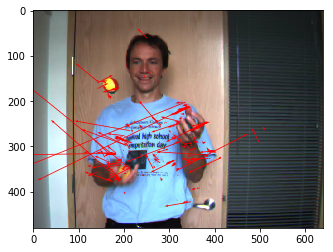

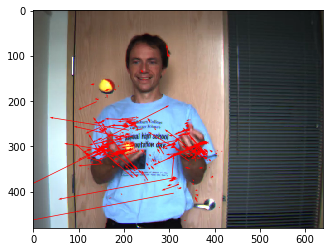

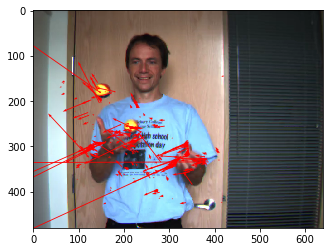

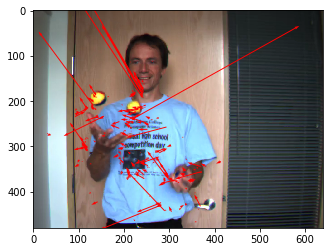

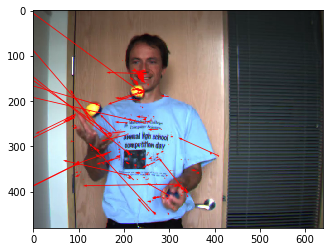

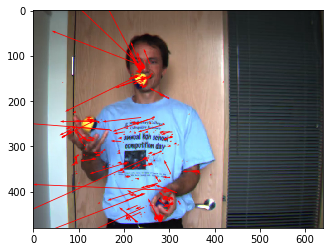

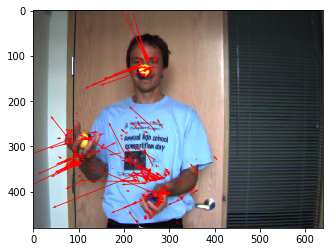

In [20]:
import skvideo.io
videogen = skvideo.io.vreader('/home/lord/cv_assignment/assignment5/Beanbags/ball.mp4')
count = 0
for frame in videogen:
    
    if (count >0):
        
        
        frame1 = frame_old.copy()
        
        
        window_size = 21
        X,Y,U,V,magnitude = optical_flow(frame1, frame, window_size,100)
        [h,w,c] =frame.shape 
        plt.imshow(frame1)
        plt.quiver(X, Y, U, V,color='r', linewidth=.5)
        plt.show()
        
       
    count = count+1
    frame_old = frame.copy()
        
        
        